<a href="https://colab.research.google.com/github/martizapico/Facultad-Aconcagua/blob/main/Gr%C3%A1ficos_Generaci%C3%B3n_Zoe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplicación de Python en Auditoria Forense**

Se elaboró este Colab con el objetivo de realizar una introducción al gran mundo de Python, teniendo en cuenta como referencia los gráfico presentados en la investigación catalagada como "Auditoría forense y datos: claves para prevenir fraudes financieros"

Para comenzar, como intoduje en la investigación Python tiene distintas librerias las cuales cumplen diversas funciones y para lograr el fin que buscamos se necesitan Pandas, Numpy y Matplotlib que cada uno de ellos cumple distintas funciones.

1. Pandas: es muy utilizada en Data Science debido a que facilita la manipulación y el análisis de grandes volumenes de datos.
2. Numpy: permite generar una estructura de datos universal y cálculos matemáticos, lo que se traduce por un mejor análisis de datos, ya que se da un intercambio de datos entre diferentes algoritmos.
3. Matplotlib: es la libreria estándar y más conocida en Python, debido a que permite crear una gran variedad de gráficos sin emplear muchas lineas de códigos.

Teniendo en cuenta esta información es que, ya podemos avanzar a incorporar las librerias a nuestro Colab de una manera muy sencilla.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

El próximo paso de la investigación corresponde a la elaboración de los gráficos. Tal como fue señalado previamente, los datos que se utilizarán para su construcción serán de carácter simulado, definidos en base a ciertos parámetros obtenidos de fuentes oficiales y referencias académicas. En consecuencia, estos gráficos no buscan reflejar información empírica directa del caso, sino ilustrar de manera pedagógica el comportamiento de las variables clave y facilitar la comprensión del análisis.

###**Monitoreo con Alertas: tasas Zoe vs Mercado**

La primera ilustración que se elaborará corresponde a la comparación entre las tasas de interés ofrecidas en los plazos fijos vigentes en ese período y las tasas prometidas por Generación Zoe.

Con el objetivo de que el gráfico represente de manera clara esta diferencia, es necesario incorporar lo que en el lenguaje de programación se denomina un “diccionario”. Esta estructura permite que Python organice y procese la información suministrada, vinculando las variables (tasas de mercado y tasas ofrecidas por Zoe) para construir una representación visual coherente y comprensible.

In [2]:
# --- Monitoreo continuo con alertas ---
meses = ["Ene", "Feb", "Mar", "Abr", "May"]
mercado = [3.4, 3.6, 3.8, 4.0, 4.0]
zoe = [10, 11, 12, 11.5, 13]

El siguiente paso consiste en la definición de un umbral de alerta, orientado a identificar de manera temprana aquellas situaciones en las que las tasas ofrecidas por una entidad superan significativamente a las de referencia del mercado. Para implementarlo, se establece una regla comparativa en donde cada vez que la rentabilidad prometida de Generación Zoe exceda en una magnitud predeterminada a la tasa de mercado, se genera una señal automática de alerta.

In [3]:
# Umbral de alerta: cuando Zoe supera +5% sobre mercado
alertas = [z - m > 5 for z, m in zip(zoe, mercado)]

Luego a la hora de la creación del gráfico se siguen determinados pasos para dejarlo parametrizado

In [4]:
# 1. Crear la figura y define el tamaño.
plt.figure(figsize=(8,5))

# 2. Dibuja la línea de las tasas de interés con esas etiqueta para la leyenda.
plt.plot(meses, mercado, marker="o", label="Tasa Mercado")
plt.plot(meses, zoe, marker="o", label="Tasa Zoe")

# 3. Traslada el umbral de alertas al gráfico.
for i, flag in enumerate(alertas):
    if flag:
        plt.scatter(meses[i], zoe[i], color="red", s=100, label="Alerta" if i == 0 else "")

# 4. Determinar el título, la etiqueta en el eje vertical y otros dato de presentación visual
plt.title("Monitoreo continuo: tasas Zoe vs Mercado")
plt.ylabel("Tasa mensual (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.savefig("/content/monitoreo_alertas_python.png")
plt.close()

# 5. Guardar el gráfico en formato png
("/content/tasas_boxplot_python.png", "/content/monitoreo_alertas_python.png")

('/content/tasas_boxplot_python.png', '/content/monitoreo_alertas_python.png')

Para finalizar y poder observar el gráfico se debe importar la imagen que fue guardada en el paso cinco.

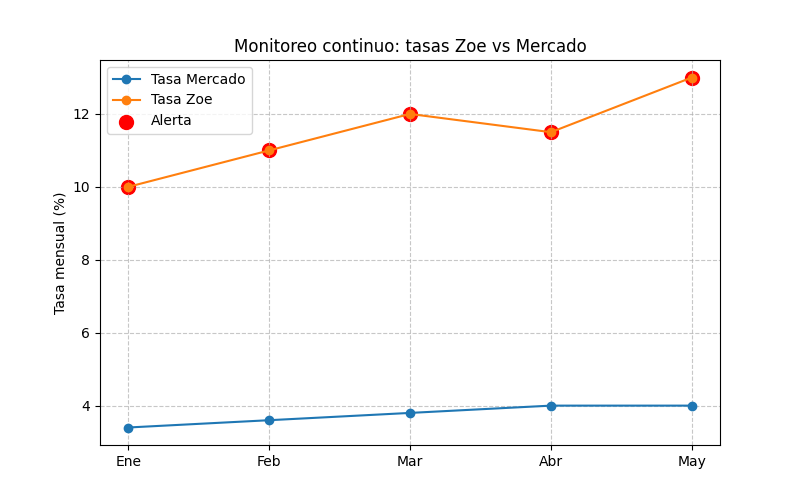

In [5]:
from IPython.display import Image

# Gráfico de líneas con alertas:
display(Image('/content/monitoreo_alertas_python.png'))

###**Caída de Generación Zoe 2022**

El próximo gráfico a realizar se trata de la representación de la dependencia a los aportes de los nuevos inversores, llevando a que el Resultado Neto diera pérdida.

Con respecto a la elaboración, la base explicada en el gráfico 3 es la misma teniendo algunos pequeños cambios al aumentar las barras.

Quedando los siguientes pasos:

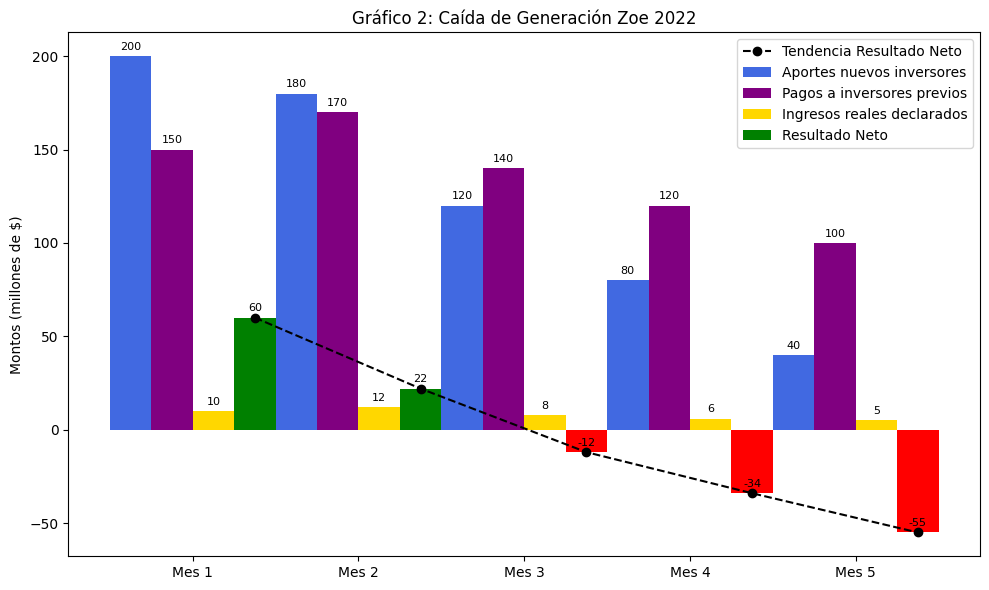

In [6]:
# 1. Elaboracción del diccionario con datos ficticios
meses = ["Mes 1", "Mes 2", "Mes 3", "Mes 4", "Mes 5"]
aportes = [200, 180, 120, 80, 40]
pagos = [150, 170, 140, 120, 100]
ingresos = [10, 12, 8, 6, 5]
resultado = [a - p + i for a, p, i in zip(aportes, pagos, ingresos)]

# 2. Configuración de posiciones
x = np.arange(len(meses))
ancho = 0.25

# 3. Realización de gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
b1 = ax.bar(x - ancho, aportes, width=ancho, label="Aportes nuevos inversores", color="royalblue")
b2 = ax.bar(x, pagos, width=ancho, label="Pagos a inversores previos", color="purple")
b3 = ax.bar(x + ancho, ingresos, width=ancho, label="Ingresos reales declarados", color="gold")

# 4. Producción de barras de resultado neto (verde si >0, rojo si <0)
colors_resultado = ["green" if val >= 0 else "red" for val in resultado]
b4 = ax.bar(x + 2*ancho, resultado, width=ancho, label="Resultado Neto", color=colors_resultado)

# 5. Determinación de tendencia del resultado neto
ax.plot(x + 2*ancho, resultado, marker="o", linestyle="--", color="black", label="Tendencia Resultado Neto")

# 5. Representación de etiquetas numéricas
for bars in [b1, b2, b3, b4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=8)

# 6. Personalización
ax.set_ylabel("Montos (millones de $)")
ax.set_title("Gráfico 2: Caída de Generación Zoe 2022")
ax.set_xticks(x + ancho/2)
ax.set_xticklabels(meses)
ax.legend()

plt.tight_layout()
plt.savefig("/content/caida_generacion_zoe_tendencia.png")
plt.show()

###**Aportes de inversores vs Patrimonio declarado**

Otro gráfico que se podría haber hecho es la comparación entre los aportes de los inversores con el patrimonio declarado a AFIP.

Para el mismo se debe:

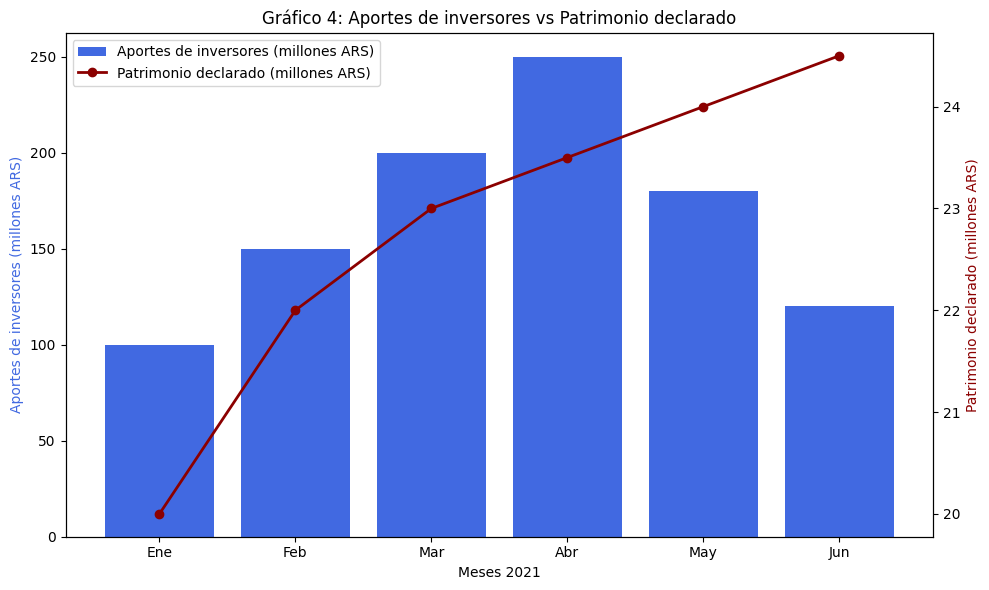

In [7]:
# 1. Realizar diccionario con datos ficticios (meses y valores)
meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun"]
aportes = [100, 150, 200, 250, 180, 120]   # millones ARS
patrimonio = [20, 22, 23, 23.5, 24, 24.5]  # millones ARS

x = np.arange(len(meses))

fig, ax1 = plt.subplots(figsize=(10,6))

# 2. Establecer Barras de aportes (aportes de inversores)
ax1.bar(x, aportes, color="royalblue", label="Aportes de inversores (millones ARS)")

# 3. Elaborar eje secundario para el patrimonio
ax2 = ax1.twinx()
ax2.plot(x, patrimonio, color="darkred", marker="o", linewidth=2, label="Patrimonio declarado (millones ARS)")

# 4. Determinar títulos y etiquetas
ax1.set_xticks(x)
ax1.set_xticklabels(meses)
ax1.set_xlabel("Meses 2021")
ax1.set_ylabel("Aportes de inversores (millones ARS)", color="royalblue")
ax2.set_ylabel("Patrimonio declarado (millones ARS)", color="darkred")

plt.title("Gráfico 4: Aportes de inversores vs Patrimonio declarado")

# 5. Leyenda combinada
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
plt.legend(lines, labels, loc="upper left")

plt.tight_layout()

# 6. Guardar imagen
plt.savefig("/content/aportes_vs_patrimonio.png")
plt.show()